# 사이킷런

# 분류 알고리즘 선택

...

In [3]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('클래스 레이블:', np.unique(y))

클래스 레이블: [0 1 2]


### 70%는 훈련 데이터 30%는 테스트 데이터로 분할:

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [5]:
print('y의 레이블 카운트:', np.bincount(y))
print('y_train의 레이블 카운트:', np.bincount(y_train))
print('y_test의 레이블 카운트:', np.bincount(y_test))

y의 레이블 카운트: [50 50 50]
y_train의 레이블 카운트: [35 35 35]
y_test의 레이블 카운트: [15 15 15]


특성 표준화:

In [6]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


## 사이킷런으로 퍼셉트론 훈련하기

In [19]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0=0.1, random_state=1) # 가중치: eta0 -> 가중치의 업데이트 크기
ppn.fit(X_train_std, y_train)

ValueError: Found input variables with inconsistent numbers of samples: [105, 712]

In [ ]:
y_pred = ppn.predict(X_test_std)
print('잘못 분류된 샘플 개수: %d' % (y_test != y_pred).sum()) # 모델의 예측 성능 평가

잘못 분류된 샘플 개수: 1


In [9]:
from sklearn.metrics import accuracy_score

print('정확도: %.3f' % accuracy_score(y_pred, y_test))

정확도: 0.978


In [10]:
print('정확도: %.3f' % ppn.score(X_test_std, y_test))

정확도: 0.978


In [11]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # 마커와 컬러맵을 설정합니다.
    markers = ('s', '>', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다.
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # 테스트 샘플을 부각하여 그립니다.
    if test_idx:
        # 모든 샘플을 그립니다.
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    facecolor='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

표준화된 훈련 데이터를 사용하여 퍼셉트론 훈련

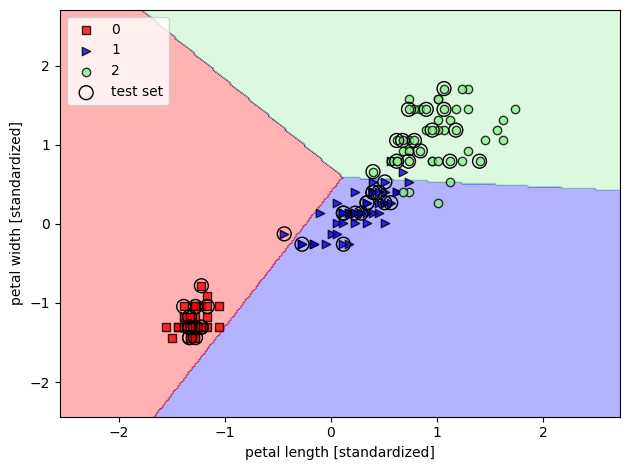

In [12]:
import numpy as np

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('images/03_01.png', dpi=300)
plt.show()

<br>
<br>

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


cm = confusion_matrix(y_test, y_pred)
dm = classification_report(y_test, y_pred)
print("%s \n %s" %(cm, dm))

[[15  0  0]
 [ 1 14  0]
 [ 0  0 15]] 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       1.00      0.93      0.97        15
           2       1.00      1.00      1.00        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



# 로지스틱 회귀를 사용한 클래스 확률 모델링

...

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$ phi (z)$')

# y 축의 눈금과 격자선
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
# plt.savefig('images/03_02.png', dpi=300)
plt.show()

<br>
<br>

### 사이킷런을 사용해 로지스틱 회귀 모델 훈련하기

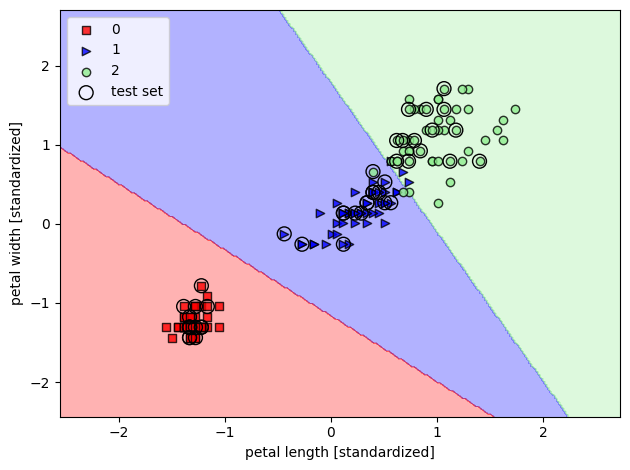

In [14]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, random_state=1)
lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

In [15]:
lr.predict_proba(X_test_std[:3, :])

array([[9.37368464e-13, 3.91458193e-04, 9.99608542e-01],
       [9.93631074e-01, 6.36892585e-03, 1.20730798e-15],
       [9.98707332e-01, 1.29266792e-03, 1.82177043e-17]])

In [ ]:
lr.predict_proba(X_test_std[:3, :]).sum(axis=1)

In [ ]:
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)

In [ ]:
lr.predict(X_test_std[:3, :])

In [16]:
lr.predict(X_test_std[0, :].reshape(1, -1))

array([2])

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred =  lr.predict(X_test_std)
cm = confusion_matrix(y_test, y_pred)
dm = classification_report(y_test, y_pred)

print("%s \n %s" %(cm, dm))


[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]] 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



<br>
<br>

### 규제를 사용해 과대적합 피하기

In [ ]:
lr = LogisticRegression(C=1, random_state=1)
lr.fit(X_train_std, y_train)

y_pred =  lr.predict(X_test_std)
cm = confusion_matrix(y_test, y_pred)
print(cm)


<br>
<br>

# 서포트 벡터 머신을 사용한 최대 마진 분류

## 최대 마진

...

## 슬랙 변수를 사용하여 비선형 분류 문제 다루기

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, 
                      y_combined,
                      classifier=svm, 
                      test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/03_11.png', dpi=300)
plt.show()

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C= 1.0, random_state=1)
svm.fit(X_train_std, y_train)

y_pred = svm.predict(X_test_std)
cm = confusion_matrix(y_test, y_pred)

print(cm)

## 사이킷런의 다른 구현

In [ ]:
from sklearn.linear_model import SGDClassifier

ppn = SGDClassifier(loss='perceptron')
lr = SGDClassifier(loss='log')
svm = SGDClassifier(loss='hinge')

/tmp/ipykernel_8478/954090161.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipykernel_8478/954090161.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr


=== Perceptron (MLP) ===
[[93 12]
 [21 53]]
              precision    recall  f1-score   support

           0      0.816     0.886     0.849       105
           1      0.815     0.716     0.763        74

    accuracy                          0.816       179
   macro avg      0.816     0.801     0.806       179
weighted avg      0.816     0.816     0.813       179


=== Logistic Regression ===
[[90 15]
 [20 54]]
              precision    recall  f1-score   support

           0      0.818     0.857     0.837       105
           1      0.783     0.730     0.755        74

    accuracy                          0.804       179
   macro avg      0.800     0.793     0.796       179
weighted avg      0.803     0.804     0.803       179


=== SVM ===
[[88 17]
 [22 52]]
              precision    recall  f1-score   support

           0      0.800     0.838     0.819       105
           1      0.754     0.703     0.727        74

    accuracy                          0.782       179
   

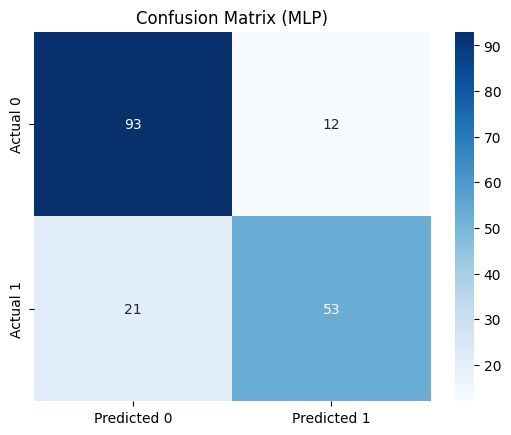

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 데이터 로딩
df = pd.read_csv('/workspaces/Bigdata_analysis/10주차/titanic.csv')

# 2. 필요한 컬럼만 선택
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
df = df[features + ['Survived']]

# 3. 결측치 처리
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# 4. 범주형 변수 인코딩
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])        # male=1, female=0
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])

# 5. 입력/출력 분리
X = df[features]
y = df['Survived']

# 6. train-test 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. 전처리 (스케일링)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 8. 모델 정의 및 학습
mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)
mlp.fit(X_train_scaled, y_train)
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_scaled, y_train)

# 9. 예측
mlp_pred = mlp.predict(X_test_scaled)
log_pred = log_reg.predict(X_test_scaled)
svm_pred = svm.predict(X_test_scaled)

# 10. 평가 출력 함수
def print_evaluation_results(model_name, y_true, y_pred):
    print(f"\n=== {model_name} ===")
    print(confusion_matrix(y_true, y_pred))
    print(classification_report(y_true, y_pred, digits=3))

# 11. 결과 출력
print_evaluation_results("Perceptron (MLP)", y_test, mlp_pred)
print_evaluation_results("Logistic Regression", y_test, log_pred)
print_evaluation_results("SVM", y_test, svm_pred)

# 12. Confusion Matrix 시각화 (MLP 기준)
cm = confusion_matrix(y_test, mlp_pred)
cm_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (MLP)')
plt.show()


/tmp/ipykernel_8478/4014195788.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


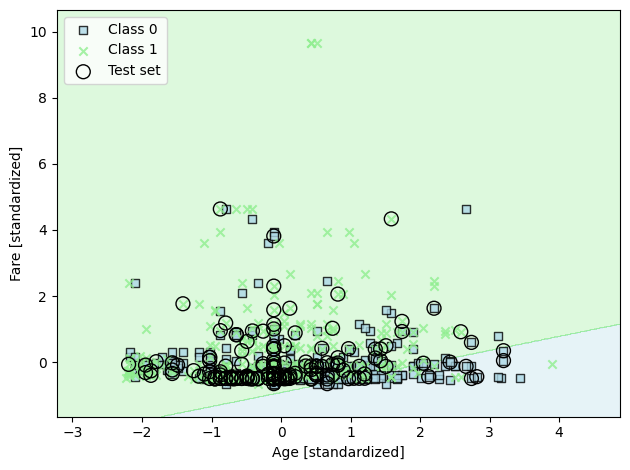

In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # 마커와 색상 정의
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('lightblue', 'lightgreen', 'gray', 'cyan', 'red')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계 만들기
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    # 결정 경계 시각화
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # 샘플 표시
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black')

    # 테스트 샘플 강조
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    facecolors='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100,
                    label='Test set')

# 특성 2개만 사용 ('Age'와 'Fare') : 요금과 나이를 분류 기준으로 함.
X2d = df[['Age', 'Fare']].values
y = df['Survived'].values

# 스케일링
scaler2d = StandardScaler()
X2d_std = scaler2d.fit_transform(X2d)

# 학습/테스트 분할
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(X2d_std, y, test_size=0.2, random_state=42)

# 퍼셉트론 학습
from sklearn.linear_model import Perceptron
ppn = Perceptron(max_iter=1000, eta0=0.1, random_state=42)
ppn.fit(X_train_2d, y_train_2d)

# 훈련/테스트 병합
X_combined_std = np.vstack((X_train_2d, X_test_2d))
y_combined = np.hstack((y_train_2d, y_test_2d))

# 테스트 인덱스
test_idx = range(len(y_train_2d), len(y_combined))

# 결정 경계 시각화
plot_decision_regions(X_combined_std, y_combined, classifier=ppn, test_idx=test_idx)
plt.xlabel('Age [standardized]')
plt.ylabel('Fare [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


/tmp/ipykernel_8478/1379063712.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipykernel_8478/1379063712.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

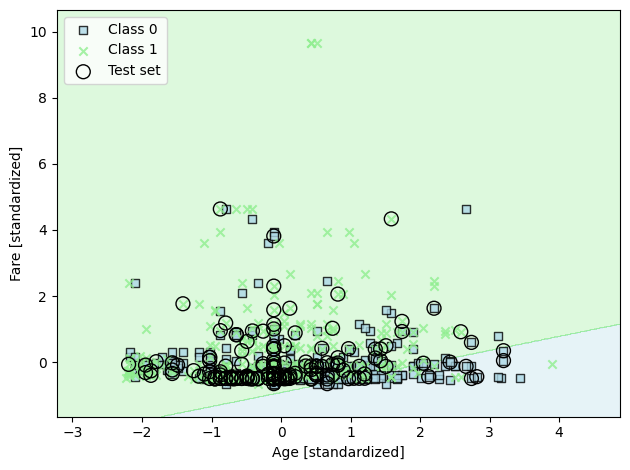

[[10 95]
 [ 1 73]] 
              precision    recall  f1-score   support

           0       0.91      0.10      0.17       105
           1       0.43      0.99      0.60        74

    accuracy                           0.46       179
   macro avg       0.67      0.54      0.39       179
weighted avg       0.71      0.46      0.35       179



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import Perceptron

# 1. 데이터 로드
df = pd.read_csv('/workspaces/Bigdata_analysis/10주차/titanic.csv')

# 2. 필요한 컬럼만 사용 (Age, Fare, Sex → 예제 확장 가능)
df = df[['Age', 'Fare', 'Survived']]

# 3. 결측치 처리
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)

# 4. 입력과 타겟 분리
X = df[['Age', 'Fare']].values
y = df['Survived'].values

# 5. 스케일링 (로지스틱 회귀, SVM을 위한 전처리)
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# 6. 훈련/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=42)

# 7. Perceptron 모델 학습
ppn = Perceptron(max_iter=1000, eta0=0.1, random_state=42)
ppn.fit(X_train, y_train)

# 8. 전체 데이터 병합
X_combined_std = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
test_idx = range(len(y_train), len(y_combined))

# 9. 결정 경계 시각화 함수
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('lightblue', 'lightgreen', 'gray', 'cyan', 'red')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black')

    if test_idx is not None:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    facecolors='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100,
                    label='Test set')

# 10. 시각화 실행
plot_decision_regions(X_combined_std, y_combined, classifier=ppn, test_idx=test_idx)
plt.xlabel('Age [standardized]')
plt.ylabel('Fare [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# 11. 리포트 출력
from sklearn.metrics import confusion_matrix, classification_report

y_pred = ppn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
print("%s \n%s" % (cm, cr))



<br>
<br>

<br>
<br>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report

# 1. 데이터 로드
df = pd.read_csv('/workspaces/Bigdata_analysis/10주차/titanic.csv')

# 2. 결측치 처리
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# 3. 범주형 인코딩
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])           # male=1, female=0
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked']) # S=2, C=0, Q=1

# 4. 사용할 feature 지정
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = df[features]
y = df['Survived']

# 5. 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6. train-test 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 7. 모델 정의
clf = MLPClassifier(hidden_layer_sizes=(20, 10), max_iter=1000, random_state=42)
clf.fit(X_train, y_train)

# 8. 예측 및 평가
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print("%s \n%s" % (cm, cr))


/tmp/ipykernel_8478/126582249.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipykernel_8478/126582249.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

[[92 13]
 [21 53]] 
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



/home/codespace/.local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


<br>
<br>